In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.style.use('science')

In [3]:
def perc_dev(x_theor, x_exp):
	return abs(x_theor-x_exp)*100/x_theor

def relative_dev(x_theor, x_exp, sigma):
	return abs(x_theor-x_exp)/sigma

def relative_error(x_exp, sigma):
	return 100*sigma/x_exp

# Magnetic Field Calibration

In [4]:
calibration_data = np.loadtxt('b_calibration.txt')
x = calibration_data[:,0]
x_error = x * 0 +0.05
y = calibration_data[:,1]
y_error = y * 0 + 5

In [5]:
def b_cal (x, a, b):
        return a * x + b

# Fit and Plot

[57.63567351  4.12987919]
[0.79518263 5.01527269]


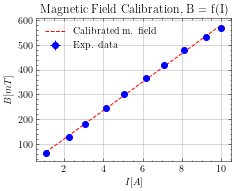

In [6]:
popt, pcov = curve_fit(b_cal, x, y, sigma=y_error)

print(popt)
print(np.sqrt(np.diag(pcov)))

t = np.linspace(np.min(x), np.max(x), 100)

plt.plot(t, b_cal(t, *popt), 'r--')
plt.errorbar(x, y, y_error, x_error, 'bo')
plt.title(r'Magnetic Field Calibration, B = f(I)')
plt.ylabel(r'$B [mT]$')
plt.xlabel(r'$I [A]$')
plt.grid()
plt.legend(['Calibrated m. field', 'Exp. data'])
plt.savefig('b_calibration.png', dpi=500)

# Διαμήκες Φαινόμενο Zeemann

In [7]:
diamikes_data = np.loadtxt('diamikes.txt')

I = diamikes_data[:,0]
B = b_cal(I, *popt)*10**(-3)
I_error = diamikes_data[:,1]
B_error = b_cal(I_error, *np.sqrt(np.diag(pcov)))*10**(-3)

E = diamikes_data[:,2]*6.24*10**(18)
E_error = diamikes_data[:,3]*6.24*10**(18)

In [8]:
def de (x, a, b):
        return a * x + b

[2.98022125e-05 1.90647625e-05]
[9.74958536e-06 4.43964084e-06]
49 1
2.9
32.7


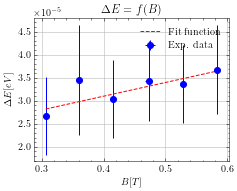

In [9]:
popt1, pcov1 = curve_fit(de, B, E, sigma=E_error, p0=(6*10**(-5), 0))
print(popt1)
print(np.sqrt(np.diag(pcov1)))


t = np.linspace(np.min(B), np.max(B), 100)

plt.plot(t, de(t, *popt1), 'r--')
plt.errorbar(B, E, E_error, B_error, 'bo')
plt.grid()
plt.title(r'$\Delta E = f(B)$')
plt.xlabel(r'$B [T]$')
plt.ylabel(r'$\Delta E [eV]$')
plt.legend(['Fit function', 'Exp. data'])
plt.savefig('diamikes.png', dpi=500)



mu = 5.79*10**(-5)

print(round(perc_dev(mu, popt1[0])),1)
print(round(relative_dev(mu, popt1[0], np.sqrt(np.diag(pcov1))[0]),1))
print(round(relative_error(popt1[0], np.sqrt(np.diag(pcov1))[0]), 1))

# Εγκάρσιο Φαινόμενο Zeemann

[4.58851648e-05 5.26442977e-05]
[2.44904966e-05 1.09337152e-05]
21 1
0.5
53.4


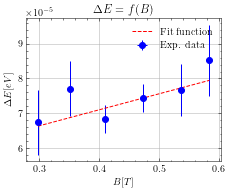

In [15]:
egkarsio_data = np.loadtxt('egkarsio.txt')

I = egkarsio_data[:,0]
B = b_cal(I, *popt)*10**(-3)
I_error = egkarsio_data[:,1]
B_error = b_cal(I_error, *np.sqrt(np.diag(pcov)))*10**(-3)

E = egkarsio_data[:,2]*6.24*10**(18)
E_error = egkarsio_data[:,3]*6.24*10**(18)


popt2, pcov2 = curve_fit(de, B, E, sigma=E_error, p0=(6*10**(-5), 0))
print(popt2)
print(np.sqrt(np.diag(pcov2)))


t = np.linspace(np.min(B), np.max(B), 100)

plt.plot(t, de(t, *popt2), 'r--')
plt.errorbar(B, E, E_error, B_error, 'bo')
plt.grid()
plt.title(r'$\Delta E = f(B)$')
plt.xlabel(r'$B [T]$')
plt.ylabel(r'$\Delta E [eV]$')
plt.legend(['Fit function', 'Exp. data'])
plt.savefig('egkarsio.png', dpi=500)



mu = 5.79*10**(-5)

print(round(perc_dev(mu, popt2[0])),1)
print(round(relative_dev(mu, popt2[0], np.sqrt(np.diag(pcov2))[0]),1))
print(round(relative_error(popt2[0], np.sqrt(np.diag(pcov2))[0]), 1))